In [10]:
import pandas as pd
train = pd.read_csv(r'C:\Users\My Pc\Desktop\HPPdataset\train.csv')
test = pd.read_csv(r'C:\Users\My Pc\Desktop\HPPdataset\test.csv')

print(train.info())
print(test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [17]:
numeric_cols = train.select_dtypes(include=['number']).columns
numeric_cols = numeric_cols.drop('SalePrice', errors='ignore')  
train[numeric_cols] = train[numeric_cols].fillna(train[numeric_cols].median())
test[numeric_cols] = test[numeric_cols].fillna(test[numeric_cols].median())

print(train[numeric_cols].isnull().sum()) 
print(test[numeric_cols].isnull().sum())  

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64
Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0

In [20]:
import pandas as pd

train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

print("TotalSF feature added successfully!")
print(train[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'TotalSF']].head())
print(test[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'TotalSF']].head())

train = pd.get_dummies(train)
test = pd.get_dummies(test)

print("\nCategorical variables encoded successfully!")
print(train.head()) 
print(test.head())

train, test = train.align(test, join='left', axis=1)

print("\nColumns aligned between train and test datasets!")
print("Train shape:", train.shape)
print("Test shape:", test.shape)

TotalSF feature added successfully!
   TotalBsmtSF  1stFlrSF  2ndFlrSF  TotalSF
0          856       856       854     2566
1         1262      1262         0     2524
2          920       920       866     2706
3          756       961       756     2473
4         1145      1145      1053     3343
   TotalBsmtSF  1stFlrSF  2ndFlrSF  TotalSF
0        882.0       896         0   1778.0
1       1329.0      1329         0   2658.0
2        928.0       928       701   2557.0
3        926.0       926       678   2530.0
4       1280.0      1280         0   2560.0

Categorical variables encoded successfully!
   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5      

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

print(train_scaled)
print(test_scaled)


[[-1.73086488  0.07337496 -0.22087509 ... -0.11785113  0.4676514
  -0.30599503]
 [-1.7284922  -0.87256276  0.46031974 ... -0.11785113  0.4676514
  -0.30599503]
 [-1.72611953  0.07337496 -0.08463612 ... -0.11785113  0.4676514
  -0.30599503]
 ...
 [ 1.72611953  0.30985939 -0.1754621  ... -0.11785113  0.4676514
  -0.30599503]
 [ 1.7284922  -0.87256276 -0.08463612 ... -0.11785113  0.4676514
  -0.30599503]
 [ 1.73086488 -0.87256276  0.23325479 ... -0.11785113  0.4676514
  -0.30599503]]
[[ 1.73323755 -0.87256276  0.46031974 ... -0.11785113  0.4676514
  -0.30599503]
 [ 1.73561022 -0.87256276  0.50573272 ... -0.11785113  0.4676514
  -0.30599503]
 [ 1.7379829   0.07337496  0.18784181 ... -0.11785113  0.4676514
  -0.30599503]
 ...
 [ 5.18784929 -0.87256276  4.0933588  ... -0.11785113 -2.13834494
  -0.30599503]
 [ 5.19022196  0.66458604 -0.35711405 ... -0.11785113  0.4676514
  -0.30599503]
 [ 5.19259463  0.07337496  0.18784181 ... -0.11785113  0.4676514
  -0.30599503]]


In [24]:
train.to_csv('train_processed.csv', index=False)
test.to_csv('test_processed.csv', index=False)

print("train_processed.csv saved successfully.")
print("test_processed.csv saved successfully.")

train_processed.csv saved successfully.
test_processed.csv saved successfully.


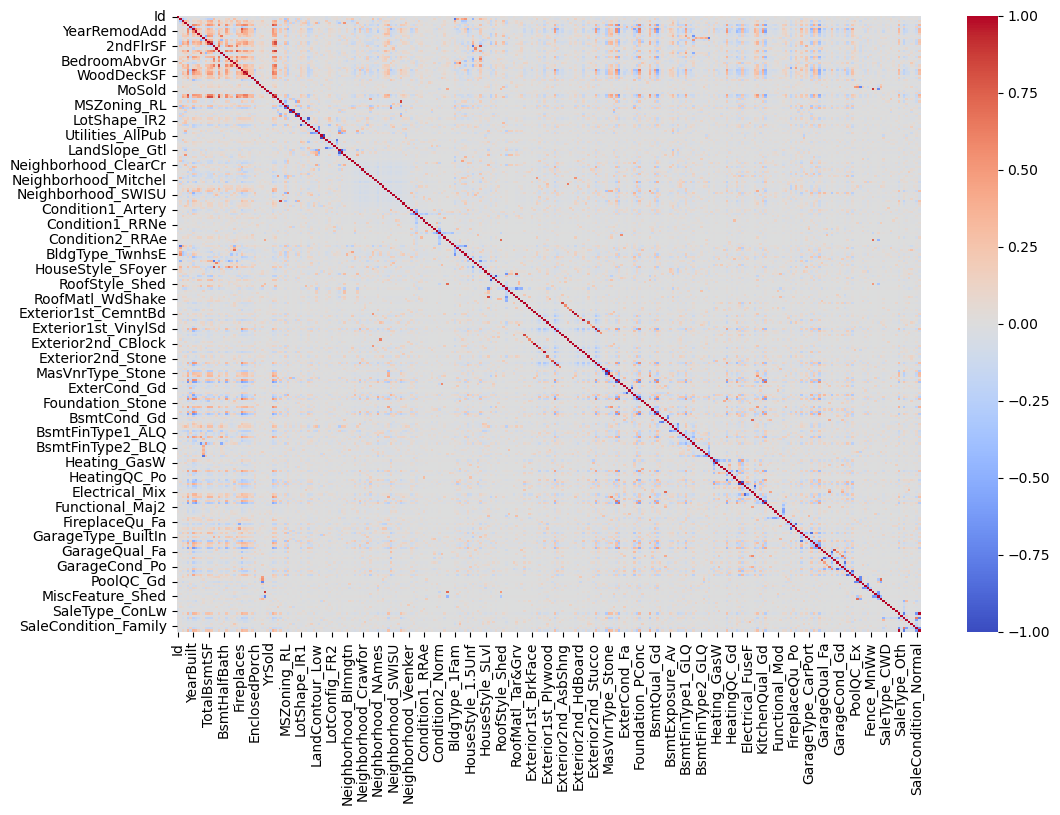

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = train.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.show()


In [31]:
from scipy.stats import boxcox

train['TotalSF'], lambda_train = boxcox(train['TotalSF'] + 1)
test['TotalSF'], lambda_test = boxcox(test['TotalSF'] + 1)

print(lambda_train)
print(lambda_test)
print(train[['TotalSF']].head())
print(test[['TotalSF']].head())


1.0156104595252238
1.0064832390278031
     TotalSF
0  21.914510
1  21.816301
2  22.233134
3  21.695331
4  23.539573
     TotalSF
0  26.148278
1  29.742672
2  29.378193
3  29.279017
4  29.389166


In [27]:
from sklearn.ensemble import RandomForestRegressor

X = train.drop(['SalePrice'], axis=1)
y = train['SalePrice']

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)

feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
important_features = feature_importances.sort_values(ascending=False)[:20]  
print(important_features)


OverallQual     0.387965
TotalSF         0.387384
2ndFlrSF        0.032686
YearBuilt       0.018421
BsmtFinSF1      0.011215
LotArea         0.010375
GrLivArea       0.010076
YearRemodAdd    0.009324
GarageCars      0.008932
GarageArea      0.008383
BsmtUnfSF       0.008069
MasVnrArea      0.005684
OverallCond     0.005377
TotalBsmtSF     0.005346
LotFrontage     0.004732
BsmtQual_Ex     0.004641
GarageYrBlt     0.004395
OpenPorchSF     0.003901
WoodDeckSF      0.003845
Id              0.003650
dtype: float64


In [30]:
low_importance_features = feature_importances[feature_importances < 0.005].index
existing_features = train.columns.intersection(low_importance_features)

train.drop(existing_features, axis=1, inplace=True)
test.drop(existing_features, axis=1, inplace=True)

print(existing_features)
print(train.shape)
print(test.shape)


Index([], dtype='object')
(1460, 15)
(1459, 15)


In [35]:
from sklearn.model_selection import train_test_split

X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)


(1168, 14)
(292, 14)
(1168,)
(292,)


In [37]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 5.7 MB/s eta 0:00:27
   ---------------------------------------- 1.6/150.0 MB 4.4 MB/s eta 0:00:34
    --------------------------------------- 2.4/150.0 MB 4.6 MB/s eta 0:00:32
    --------------------------------------- 3.1/150.0 MB 4.4 MB/s eta 0:00:34
   - -------------------------------------- 3.9/150.0 MB 4.3 MB/s eta 0:00:35
   - -------------------------------------- 5.0/150.0 MB 4.1 MB/s eta 0:00:36
   - -------------------------------------- 5.5/150.0 MB 4.1 MB/s eta 0:00:36
   - -------------------------------------- 6.3/150.0 MB 4.0 MB/s eta 0:00:36
   - -------------------------------------- 7.3/150.0 MB 4.0 MB/s eta 0:00:36
   -- ------------------------------------- 8.1/150.0 MB 4.0 MB/s eta 0:00:36
   -- ------------------------------------- 8.9/150.0 MB 4.0 MB/s eta 0:00:35
   -- ------------------------------------- 9.7/150.0 MB 4.0 MB/s eta 0

In [38]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=500, learning_rate=0.05)
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

print(y_pred[:10])


[146703.39  306406.16  116666.29  166629.55  286927.34   73622.695
 221226.33  146860.45   71893.516 130390.06 ]


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_valid, y_pred)
rmse = mean_squared_error(y_valid, y_pred) ** 0.5

print(mae)
print(rmse)


17057.106124250855
27240.28702427896


In [41]:
test = test[X_train.columns]  


In [42]:
print(X_train.columns)
print(test.columns)


Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'GrLivArea', 'GarageCars', 'GarageArea', 'TotalSF'],
      dtype='object')
Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'GrLivArea', 'GarageCars', 'GarageArea', 'TotalSF'],
      dtype='object')


In [43]:
import pandas as pd

test_predictions = model.predict(test)
submission = pd.DataFrame({'Id': test.index, 'SalePrice': test_predictions})

submission.to_csv('submission.csv', index=False)

print(submission.head())
print("submission.csv saved successfully.")


   Id     SalePrice
0   0  186388.09375
1   1  214994.15625
2   2  259988.34375
3   3  267520.71875
4   4  338954.03125
submission.csv saved successfully.
